<a href="https://colab.research.google.com/github/cruel666/Reprrrausity-/blob/master/%D0%9B%D1%8E%D0%B1%D0%B8%D0%BC%D0%B0%D1%8F_%D0%9B%D0%B0%D0%B1%D0%B0_%E2%84%962.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd 
import numpy as np # для математической обработки данных 
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker # для управления делениями осей
from bokeh.plotting import figure, output_file, show 
from bokeh.io import output_notebook 

output_notebook()

In [0]:
#Получение и чтение файла из облака 
url = "https://drive.google.com/uc?export=download&id=1KfIzbQZwilaAL_W2vr5vcVjbVlYLQOb6"
input_df = pd.read_excel(url, header = None) 
input_df.head()

,0,1,2
0,01.01.2015 0:30:00,1463.0,1776.5
1,01.01.2015 1:00:00,1452.0,1765.5
2,01.01.2015 1:30:00,1391.5,1699.5
3,01.01.2015 2:00:00,1435.5,1749.0
4,01.01.2015 2:30:00,1435.5,1749.0


In [0]:
input_df.tail(240)

,0,1,2
69888,27.12.2018 0:30:00,868.0,1311.0
69889,27.12.2018 1:00:00,1584.0,1981.0
69890,27.12.2018 1:30:00,1517.0,1954.0
69891,27.12.2018 2:00:00,1525.0,1969.0
69892,27.12.2018 2:30:00,1444.0,1895.0
...,...,...,...
70123,31.12.2018 22:00:00,1762.0,2220.0
70124,31.12.2018 22:30:00,1679.0,2148.0
70125,31.12.2018 23:00:00,1819.0,2253.0
70126,31.12.2018 23:30:00,1566.0,2035.0


In [0]:
input_df_cleared = input_df.iloc[-240 : ]
input_df_cleared

,0,1,2
69888,27.12.2018 0:30:00,868.0,1311.0
69889,27.12.2018 1:00:00,1584.0,1981.0
69890,27.12.2018 1:30:00,1517.0,1954.0
69891,27.12.2018 2:00:00,1525.0,1969.0
69892,27.12.2018 2:30:00,1444.0,1895.0
...,...,...,...
70123,31.12.2018 22:00:00,1762.0,2220.0
70124,31.12.2018 22:30:00,1679.0,2148.0
70125,31.12.2018 23:00:00,1819.0,2253.0
70126,31.12.2018 23:30:00,1566.0,2035.0


In [0]:
p01 = figure(title = 'Электропотребление первого разреза', plot_width = 800, plot_height = 400)
 
p01.line(np.arange(len(input_df[1])), input_df[1], line_width = 2, color = 'green')
p01.xaxis.axis_label = 'Время'
p01.yaxis.axis_label = 'Электропотребление'
 
show(p01)

p02 = figure(title = 'Электропотребление второго разреза', plot_width = 800, plot_height = 400)
 
p02.line(np.arange(len(input_df[2])), input_df[2], color = 'orange')
p02.xaxis.axis_label = 'Время'
p02.yaxis.axis_label = 'Электропотребление'

show(p02)

In [0]:
input_df_cleared = input_df.iloc[-240 : ] 
input_df_cleared

In [0]:
razrez1 = input_df_cleared[1].values
razrez2 = input_df_cleared[2].values
razrezsum = razrez1 + razrez2

In [0]:
p1 = figure(title = 'Электропотребление первого разреза за последние 5 суток', plot_width = 800, plot_height = 400)
 
p1.line(np.arange(len(razrez1)), razrez1, line_width = 2, color = 'green')
p1.xaxis.axis_label = 'Время'
p1.yaxis.axis_label = 'Электропотребление'
 
show(p1)

p2 = figure(title = 'Электропотребление второго разреза за последние 5 суток', plot_width = 800, plot_height = 400)
 
p2.line(np.arange(len(razrez2)), razrez2, line_width = 2, color = 'orange')
p2.xaxis.axis_label = 'Время'
p2.yaxis.axis_label = 'Электропотребление'
 
show(p2)

psum = figure(title = 'Суммарное электропотребление обоих разрезов за последние 5 суток', plot_width = 800, plot_height = 400)
 
psum.line(np.arange(len(razrezsum)), razrezsum, line_width = 2)
psum.xaxis.axis_label = 'Время'
psum.yaxis.axis_label = 'Электропотребление'
 
show(psum)

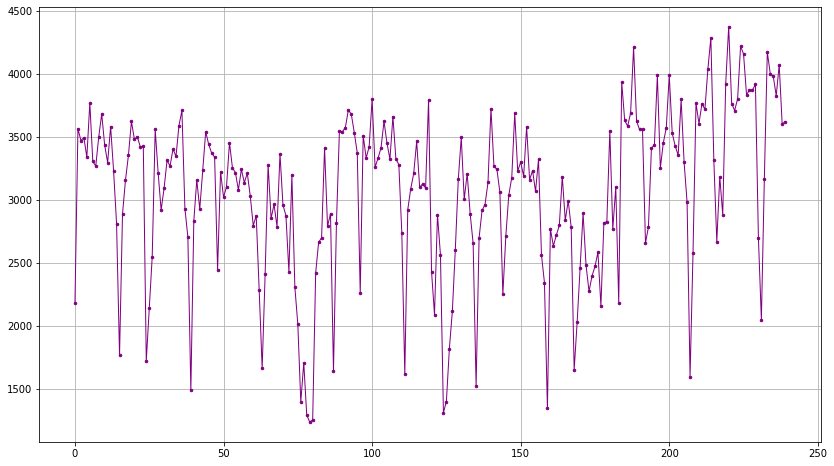

In [0]:

import matplotlib.pyplot as plt
sum_matrix = input_matrix[:, 1] + input_matrix[:, 2]
# вначале создать объект для рисования на нем
fig, ax = plt.subplots(1, 1, figsize = (14, 8))
# таймстампы можно для наглядности сгенерировать от нуля с шагом 30 минут (как в исходных данных)
timestamps = range(0, input_matrix.shape[0] * 15, 30)
# зададим диапазон
begin = 0
end   = 240 
step = 1
ax.plot(sum_matrix[begin : end : step],'purple',  marker = '.', linewidth = 1, markersize = 5)
plt.grid(True)
plt.show()


In [0]:
maximums = np.zeros(len(razrezsum)) 
for i in range(0, len(razrezsum) - 1): 
  if (razrezsum[i] > razrezsum[i-1]) and (razrezsum[i] > razrezsum[i+1]): 
    maximums[i] = razrezsum[i] 
  else: 
    maximums[i] = None # чтобы ненужные значения (нули) не отмечались на графике
maximums[239] = None


In [0]:
# потребление суммарное за последние 5 суток с точками локальных максимумов
pmax = figure(plot_width = 800, plot_height = 400)
 
pmax.line(np.arange(len(razrezsum)), razrezsum, line_width = 2)
pmax.scatter(np.arange(len(maximums)), maximums, size=7, color="red")
pmax.xaxis.axis_label = 'Время'
pmax.yaxis.axis_label = 'Электропотребление'
 
show(pmax)